Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Cliquez sur le lien suivant pour télécharger le fichier CIF du matériau


/home/users/r/p/rperger/mp-20289.cif

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

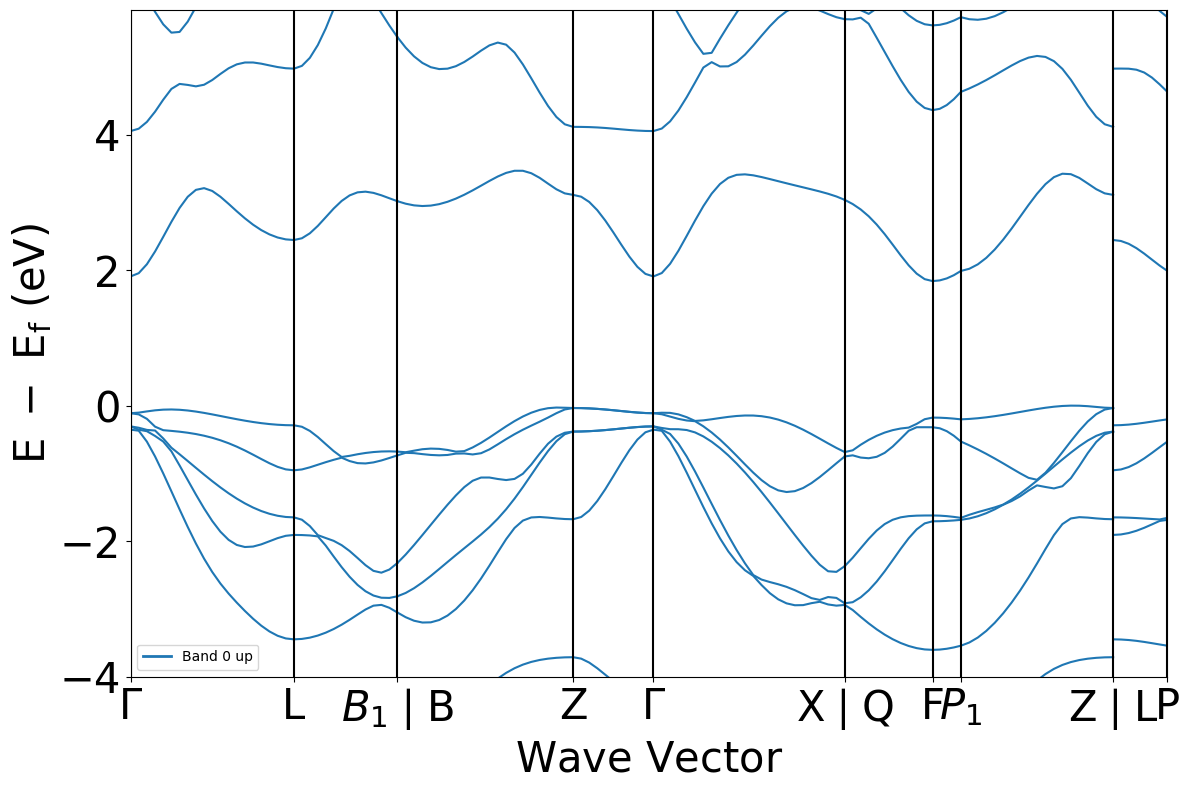

Le gap énergétique (écart entre conduction et valence) est de : {'direct': False, 'energy': 1.8377, 'transition': '(0.544,0.544,0.413)-F'}
La plus forte dispersion dans la bande de valence se traduit par une pente de 0.9908459039859259 dans la direction W-L
Cette valeur est représentée par la flèche rouge sur le graphique.
La dispersion la plus faible dans la bande de valence est de 0.0 dans la direction X-W
elle est représentée par la flèche bleue sur le diagramme.
 
Dans la bande de conduction, la plus forte dispersion correspond à une pente de 2.5668384697967612 dans les directions W-K et U-W
Ces valeurs sont représentées par les flèches vertes sur le graphique.
La plus faible dispersion dans la bande de conduction est de 0.0 dans la direction L-K
elle est représentée par la flèche jaune sur le diagramme.
 
Voici le graphique représentant la structure des bandes électroniques du matériau :


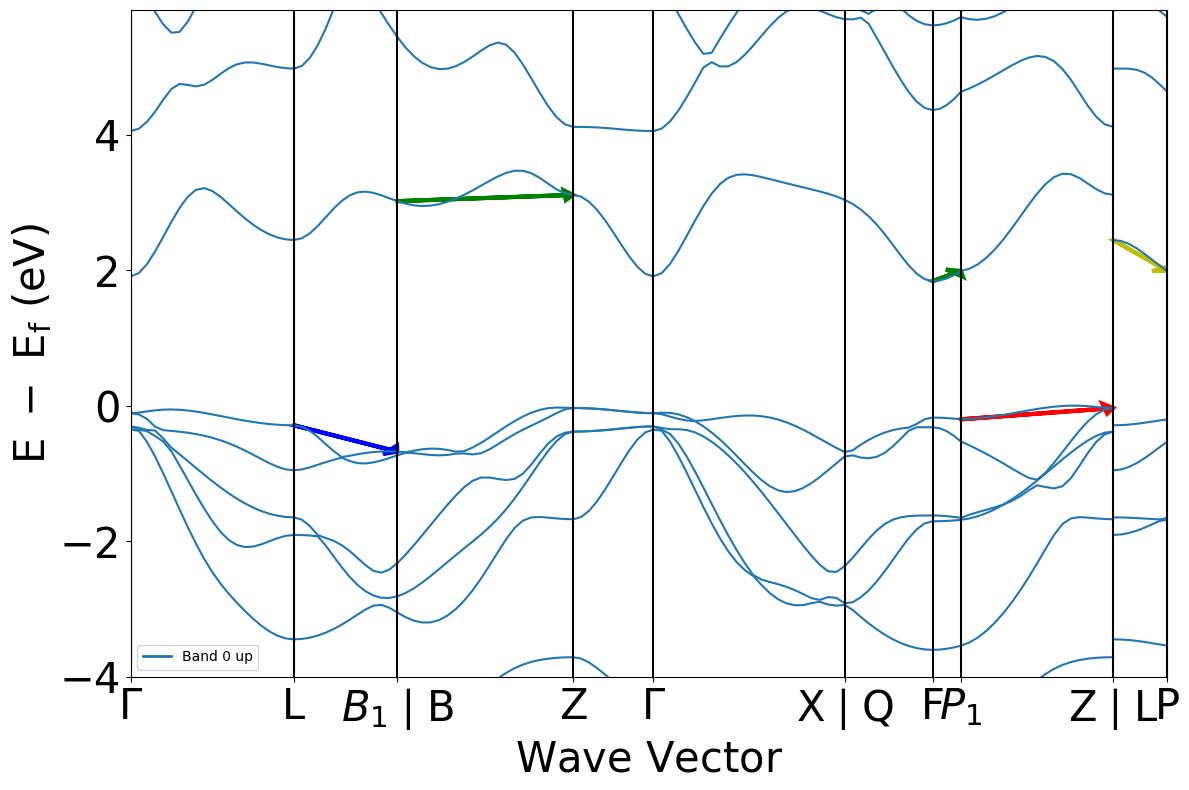

On calcule la masse effective dans la bande de valence
Pour obtenir la courbure de la dispersion on utilise deux points proches :
Point supérieur : ( 0.0 , -0.11179999999999968 ) (branche Gamma)
Point suivant : ( 0.953846313203575 , -0.29019999999999957 ) (branche X)


La valeur de la dérivée seconde f''(k) est de : -0.39216428103433704 [eV.A^2]  = -6.283164199189603e-40 [J.m^2]
En appliquant la relation m* = (hbar**2) / f''(k), la masse effective calculée est :
m* = -1.770002635715402e-29 [kg]
Calcul de la masse effective dans la bande de conduction
Pour déterminer la courbure dans cette bande, nous utilisons deux points :
Point inférieur : ( 0.0 , 1.9064000000000005 ) (branche Gamma)
Point suivant : ( 0.953846313203575 , 1.9064000000000005 ) (branche X)


La dérivée seconde f''(k) pour la conduction est de : 1.181328949707695 [eV.A^2]  = 1.892697556415075e-39 [J.m^2]
D'après la formule m* = (hbar**2) / f''(k), la masse effective dans la conduction est :
m* = 5.875855418898913e-30 [kg

In [2]:
from pymatgen.ext.matproj import MPRester  
from pymatgen.io.cif import CifWriter  
from IPython.display import FileLink  
from pymatgen.electronic_structure.plotter import BSPlotter  
import numpy as np  
import matplotlib.pyplot as plt  

# On définit la clé d'API pour accéder à la base de données
key = "kHK7l7itQo2c5bLbQQIsHOTh5cQ7HUnw"  
material = "mp-20289"   # variables pour l'identifiant du matériau (NaInS2)
m = MPRester(key)

# On récupère la structure du matériau en cellule unitaire conventionnelle
struct = m.get_structure_by_material_id(material, conventional_unit_cell=True)

# On affiche un lien pour télécharger la structure
w = CifWriter(struct)
w.write_file(material+".cif") 
print("Cliquez sur le lien suivant pour télécharger le fichier CIF du matériau") 
display(FileLink(material+".cif")) 

# On récupère la structure de bande du matériau 
band = m.get_bandstructure_by_material_id(material)

# On crée un objet BSPlotter pour voire la structure de bandes
bsplotter = BSPlotter(band)
bsplotter.show() 

# On affiche l'écart d'énergie entre la conduction et la valence
print("Le gap énergétique (écart entre conduction et valence) est de :", band.get_band_gap()) 

# On récupère les données de la structure de bandes
data = bsplotter.bs_plot_data()
pl = bsplotter.get_plot()
E = data.get('energy').get('1')  # Énergies des bandes
D = data.get('ticks').get('distance')  # Distances entre les points dans l'espace k

# On définit les indices des bandes de valence et de conduction
Vindex = 15
Cindex = 16

# On initialise des tableaux pour stocker les pentes de la dispersion des bandes
slopeV = np.zeros(10)  # Pentes pour la bande de valence
slopeC = np.zeros(10)  # Pentes pour la bande de conduction
Dbranch = np.unique(D)   # On élimine les redondances dans les distances

# On calcule les pentes des branches des bandes de valence et de conduction
for i in range(len(Dbranch)-1):
    DeltaD = Dbranch[i+1]-Dbranch[i]  # Différence de distance entre deux points
    slopeV[i] = abs(((E[i][Vindex])[-1] - (E[i][Vindex])[0])/(DeltaD))  # Pente de la bande de valence
    slopeC[i] = abs(((E[i][Cindex])[-1] - (E[i][Cindex])[0])/(DeltaD))  # Pente de la bande de conduction

# On détermine les pentes maximales et minimales pour chaque bande
maxV = np.max(slopeV)  # Pente maximale de la bande de valence
minV = np.min(slopeV)  # Pente minimale de la bande de valence
print("La plus forte dispersion dans la bande de valence se traduit par une pente de", maxV, "dans la direction W-L")
print("Cette valeur est représentée par la flèche rouge sur le graphique.")
print("La dispersion la plus faible dans la bande de valence est de", minV, "dans la direction X-W")
print("elle est représentée par la flèche bleue sur le diagramme.")
print(" ")

maxC = np.amax(slopeC)  # Pente maximale de la bande de conduction
minC = np.amin(slopeC)  # Pente minimale de la bande de conduction
print("Dans la bande de conduction, la plus forte dispersion correspond à une pente de", maxC, "dans les directions W-K et U-W")
print("Ces valeurs sont représentées par les flèches vertes sur le graphique.")
print("La plus faible dispersion dans la bande de conduction est de", minC, "dans la direction L-K")
print("elle est représentée par la flèche jaune sur le diagramme.")
print(" ")

# On affiche les flèches représentant les dispersions maximales et minimales
plt.arrow(Dbranch[7], (E[7][Vindex])[0], Dbranch[8] - Dbranch[7], (E[7][Vindex])[-1] - (E[7][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(Dbranch[1], (E[1][Vindex])[0], Dbranch[2] - Dbranch[1], (E[1][Vindex])[-1] - (E[1][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
plt.arrow(Dbranch[2], (E[2][Cindex])[0], Dbranch[3] - Dbranch[2], (E[2][Cindex])[-1] - (E[2][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.arrow(Dbranch[6], (E[6][Cindex])[0], Dbranch[7] - Dbranch[6], (E[6][Cindex])[-1] - (E[6][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.arrow(Dbranch[8], (E[8][Cindex])[0], Dbranch[9] - Dbranch[8], (E[8][Cindex])[-1] - (E[8][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)

print("Voici le graphique représentant la structure des bandes électroniques du matériau :")
plt.show()

# Constantes physiques
hbar = 1.054571818*10**(-34)  # Constante de Planck réduite en J.s
eV = 1.602176563*10**(-19)  # 1 eV en joules
A = 10**(-10)  # Angström en mètres

# Masse effective dans la bande de valence
print("On calcule la masse effective dans la bande de valence")

print("Pour obtenir la courbure de la dispersion on utilise deux points proches :")
print("Point supérieur : (", Dbranch[0], ",", E[0][Vindex][0], ") (branche Gamma)")
print("Point suivant : (", Dbranch[1], ",", E[1][Vindex][0], ") (branche X)")

a = (E[1][Vindex][0] - E[0][Vindex][0]) / (Dbranch[1] - Dbranch[0]) ** 2

d2E = 2 * a * (A**2) * eV
print("\n")
print("La valeur de la dérivée seconde f''(k) est de :", 2 * a, "[eV.A^2]  =", d2E, "[J.m^2]")

print("En appliquant la relation m* = (hbar**2) / f''(k), la masse effective calculée est :")
print("m* =", hbar**2 / d2E, "[kg]")

# Masse effective dans la bande de conduction
print("Calcul de la masse effective dans la bande de conduction")

print("Pour déterminer la courbure dans cette bande, nous utilisons deux points :")
print("Point inférieur : (", Dbranch[0], ",", E[0][Cindex][0], ") (branche Gamma)")
print("Point suivant : (", Dbranch[1], ",", E[0][Cindex][0], ") (branche X)")

a = (E[1][Cindex][0] - E[0][Cindex][0]) / (Dbranch[1] - Dbranch[0]) ** 2

d2E = 2 * a * (A**2) * eV

print("\n")
print("La dérivée seconde f''(k) pour la conduction est de :", 2 * a, "[eV.A^2]  =", d2E, "[J.m^2]")

print("D'après la formule m* = (hbar**2) / f''(k), la masse effective dans la conduction est :")
print("m* =", hbar**2 / d2E, "[kg]")